<a href="https://colab.research.google.com/github/theManiac218/python/blob/main/er3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/emotion.csv')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [ ]:
df.label.value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


<Axes: ylabel='count'>

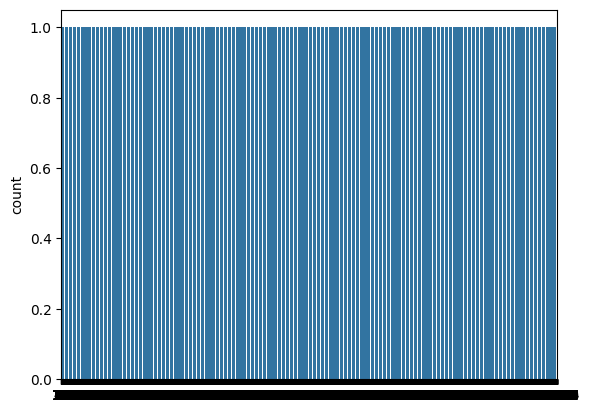

In [ ]:
import seaborn as sns
sns.countplot(df.label)

In [ ]:
df.isna().sum()

,0
text,0
label,0


In [ ]:
df['text']=df['text'].apply(lambda x:"".join(x.lower() for x in x.split()))

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['text']=df['text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

In [ ]:
!pip install textblob

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from textblob import Word
nltk.download('wordnet')
df['text']=df['text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text
0,ididntfeelhumiliated
1,icangofromfeelingsohopelesstosodamnedhopefulju...
2,imgrabbingaminutetopostifeelgreedywrong
3,iameverfeelingnostalgicaboutthefireplaceiwillk...
4,iamfeelinggrouchy


In [ ]:
# get features and seperate data

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df['text'])

X = X.toarray()

y = df.label.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)

In [ ]:
#model building
from sklearn.naive_bayes import GaussianNB # Import GaussianNB
#from sklearn.naive_bayes import MultinomialNB # This line is not needed if you intend to use GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,pred)

0.0359375

In [ ]:
classification_report(y_test,pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       905\n           1       0.00      0.00      0.00      1053\n           2       0.00      0.00      0.00       271\n           3       0.00      0.00      0.00       459\n           4       0.00      0.00      0.00       397\n           5       0.04      1.00      0.07       115\n\n    accuracy                           0.04      3200\n   macro avg       0.01      0.17      0.01      3200\nweighted avg       0.00      0.04      0.00      3200\n'

In [ ]:
confusion_matrix(y_test,pred)

array([[   0,    0,    0,    0,    0,  905],
       [   0,    0,    2,    0,    0, 1051],
       [   0,    3,    0,    0,    0,  268],
       [   0,    0,    0,    0,    0,  459],
       [   0,    0,    0,    1,    0,  396],
       [   0,    0,    0,    0,    0,  115]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [ ]:
clf_rf=RandomForestClassifer()
clf_rf.fit(X_train,y_train)
y_pred=clf_rf.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
classification_report(y_test,y_pred)